<a href="https://colab.research.google.com/github/RahafAlharthi/T5_labs/blob/main/OCR_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Application Using CNN on MNIST Dataset
This notebook demonstrates how to apply Convolutional Neural Networks (CNN) for Optical Character Recognition (OCR). We will be working with the MNIST dataset, which contains images of handwritten digits. The goal is to build an OCR system that can accurately classify these digits using deep learning with CNN.
We will:
1. Load and preprocess the dataset
2. Build and train a CNN model
3. Make predictions on new images

## Step 1: Import Libraries
Let's start by importing the necessary libraries for building and training our model.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess the MNIST Dataset
We will now load the MNIST dataset, reshape it to fit the input of our CNN model, and normalize the data to be in the range [0, 1].

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping and normalizing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Step 3: Build the CNN Model
We'll define a simple CNN model with the following layers:
- Convolutional layers for feature extraction
- MaxPooling for downsampling
- Dropout layers to prevent overfitting
- Dense layers for final classification

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 4: Compile and Train the Model
Next, we'll compile our model using categorical cross-entropy as the loss function, Adadelta as the optimizer, and accuracy as the metric.
After compiling, we'll train the model on the training dataset.

In [4]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.1024 - loss: 2.3011 - val_accuracy: 0.2516 - val_loss: 2.2413
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2114 - loss: 2.2370 - val_accuracy: 0.4704 - val_loss: 2.1621
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3168 - loss: 2.1600 - val_accuracy: 0.5781 - val_loss: 2.0605
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4045 - loss: 2.0632 - val_accuracy: 0.6344 - val_loss: 1.9285
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4781 - loss: 1.9374 - val_accuracy: 0.6841 - val_loss: 1.7625
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5381 - loss: 1.7812 - val_accuracy: 0.7189 - val_loss: 1.5744
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5791 - loss: 1.6237 - val_accuracy: 0.7455 - val_loss: 1.3824
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6107 - loss: 1.4613 - val_accuracy:

## Step 5: Visualizing Random Predictions from the Test Set
Finally, let's visualize a random image from the test set along with the model's prediction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


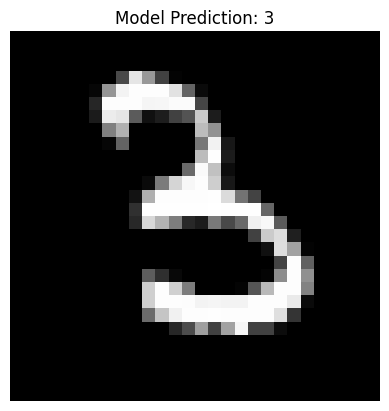

In [6]:

# Select a random image
random_idx = random.randint(0, x_test.shape[0] - 1)
random_image = x_test[random_idx]

# Get the model's prediction
predicted_label = model.predict(random_image.reshape(1, 28, 28, 1)).argmax()

# Plot the image
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f'Model Prediction: {predicted_label}')
plt.axis('off')
plt.show()